In [9]:
import os
import nibabel as nib
from nibabel.testing import data_path
import matplotlib
from matplotlib import pyplot as plt
from nilearn import plotting, image
from nilearn.image import mean_img
import numpy as np

from functions import sum_3D_array, normalize_array, create_volume, naive_sanity_check, show_3D_array, view_sagittal_slices, view_middle_slice

In [10]:
# link to fMRI scan
input_fmri_file = "/Users/joachimpfefferkorn/Documents/mri_data/To_Share/T1w_Space/filtreg_sm_dspk_sk_sub-AG5_ses-baseline_task-Newresting1HB6scan_space-T1w_desc-preproc_bold.nii"

In [11]:
andrew_brain_filename = os.path.join(data_path, input_fmri_file)
andrew_brain_img = nib.load(andrew_brain_filename) #why is this a join?

In [12]:
print(andrew_brain_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (87, 98, 81, 400)
affine:
[[  1.79700005  -0.          -0.         -76.36711884]
 [ -0.           1.79700005  -0.         -85.59513092]
 [  0.           0.           1.79999995 -99.18925476]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 48
dim             : [  4  87  98  81 400   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.797 1.797 1.8   1.2   0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 80
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0


/Users/joachimpfefferkorn/repos/neurovolume/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



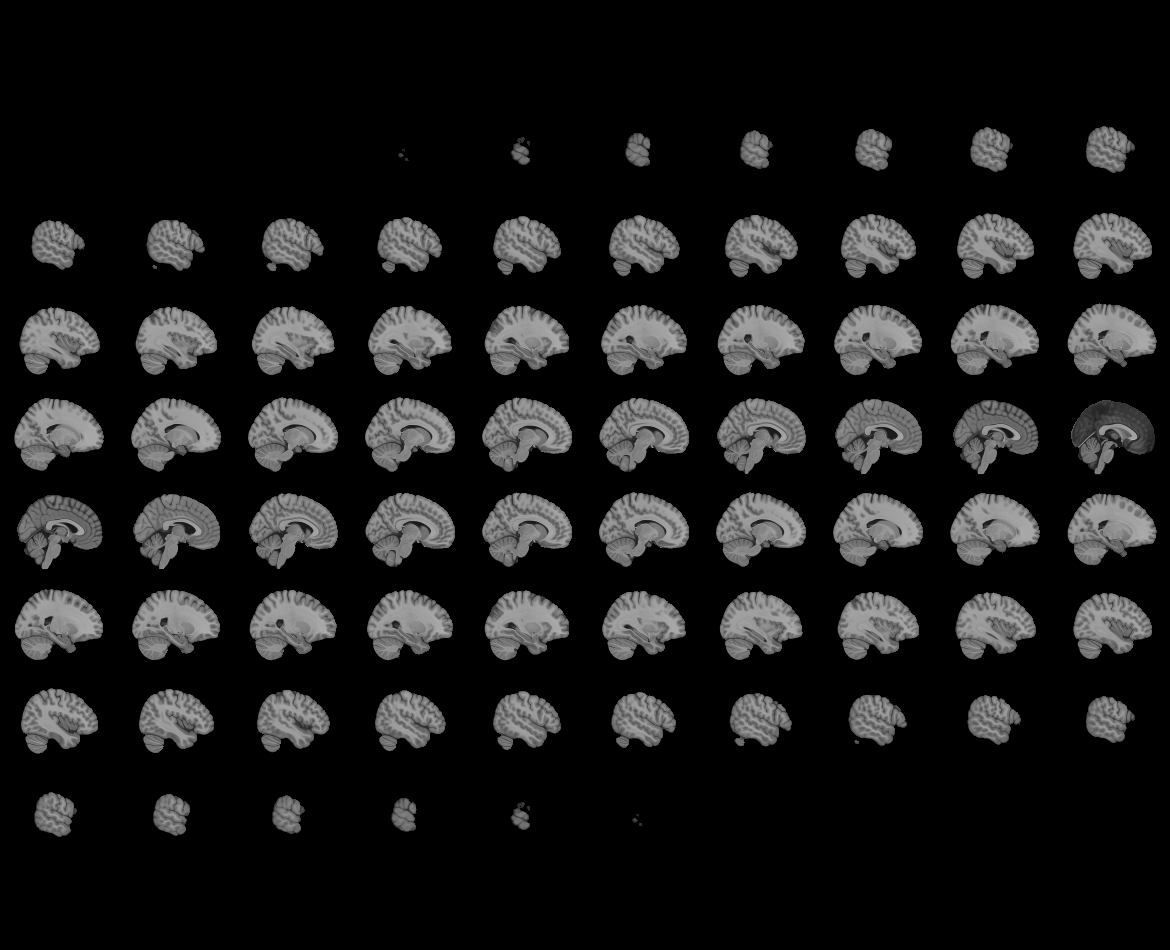
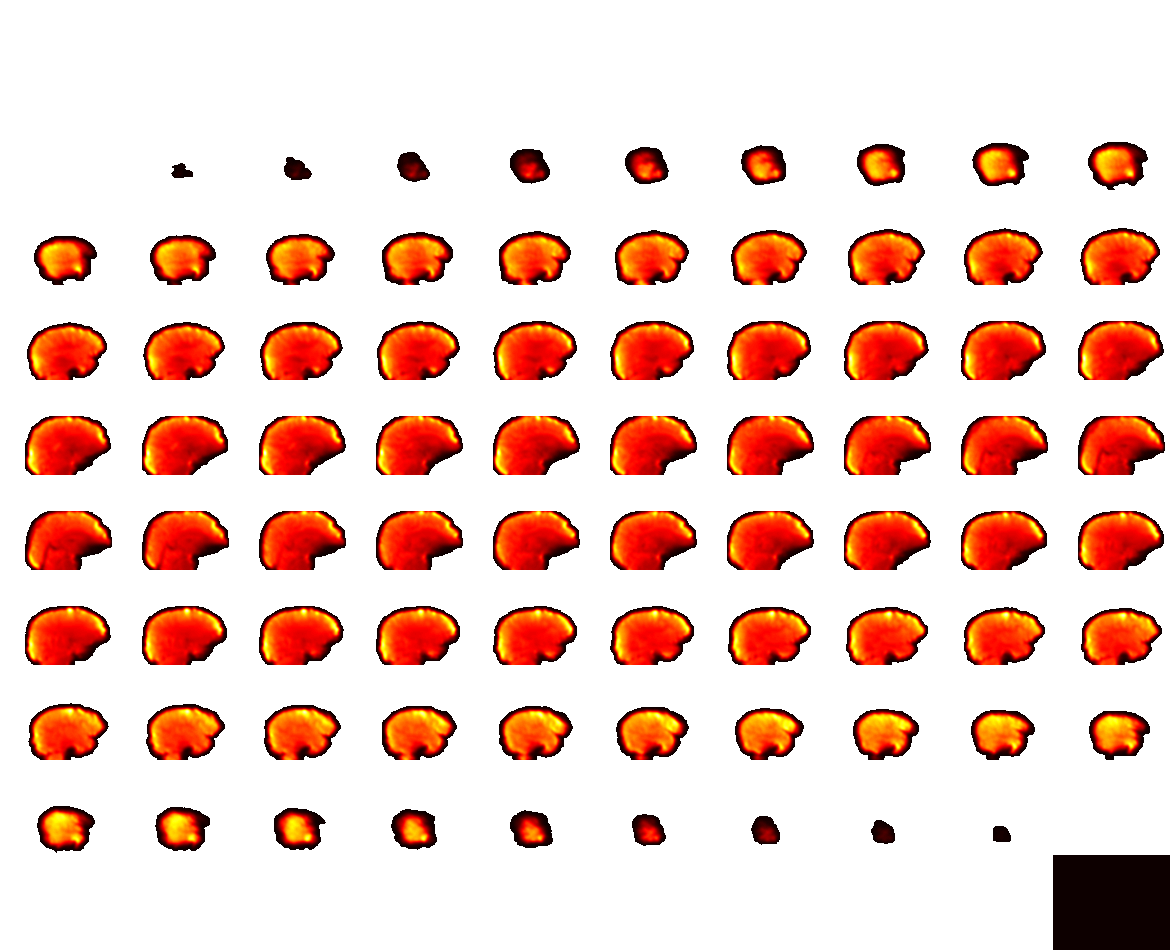

In [13]:
plotting.view_img(mean_img(andrew_brain_filename), threshold=10)

In [14]:

andrew_brain_data = andrew_brain_img.get_fdata()
normalized_brain_array = normalize_array(andrew_brain_data)

In [15]:
normalized_brain_vol = create_volume(normalized_brain_array)

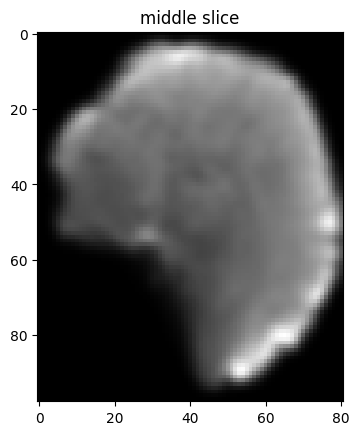

In [16]:
# TODO you need to get the BOLD out of


time_index = normalized_brain_vol[:,:,:,200]

slice = time_index[:][:][50] #hard coded for now

plt.imshow(slice, cmap="gray")
plt.title("middle slice")
plt.show()

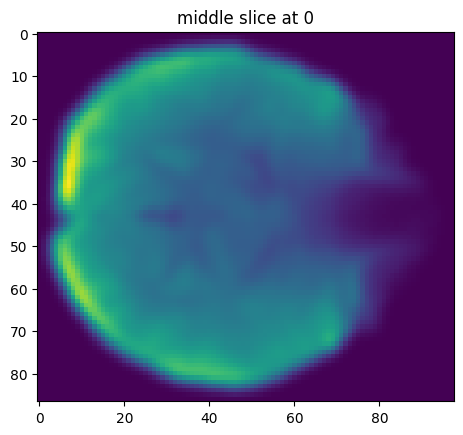

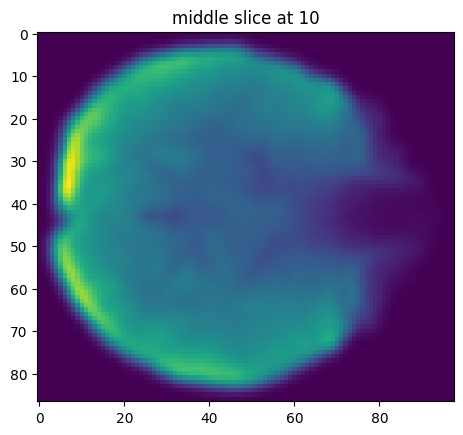

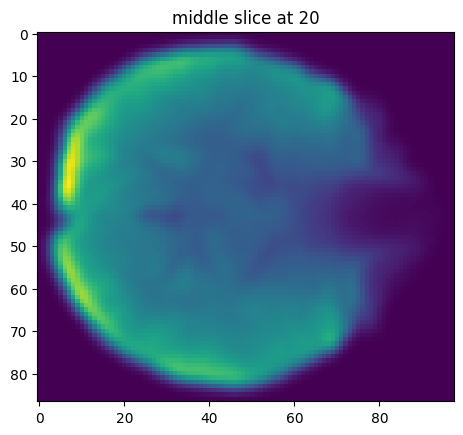

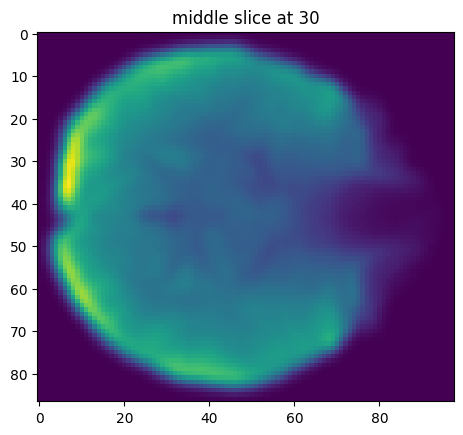

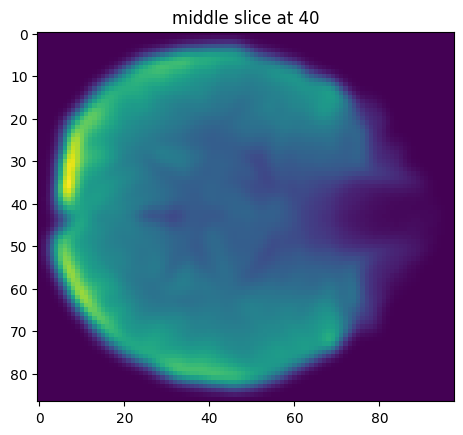

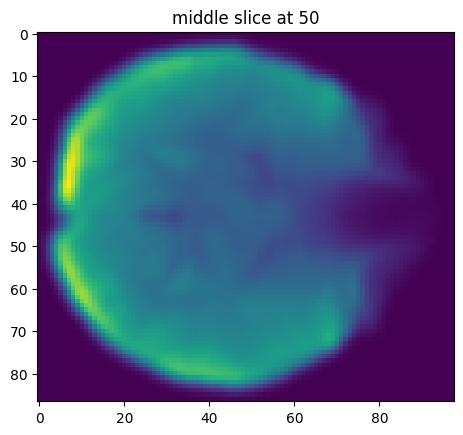

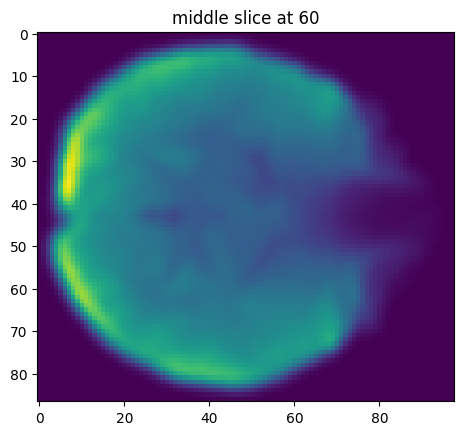

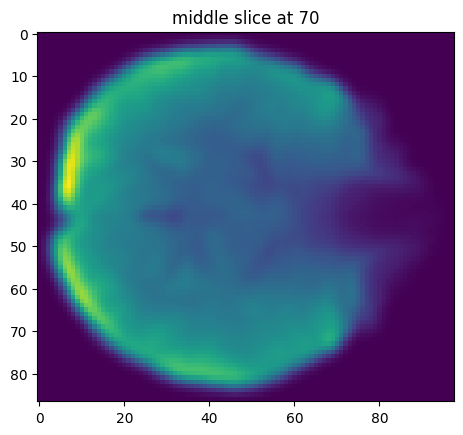

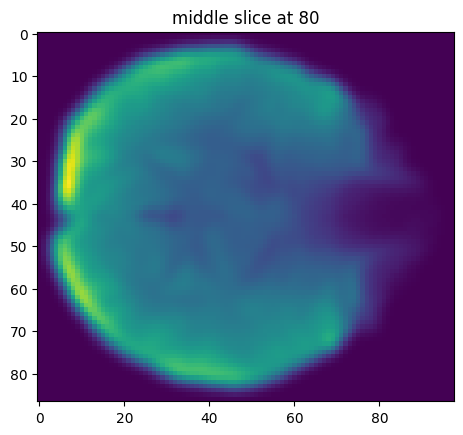

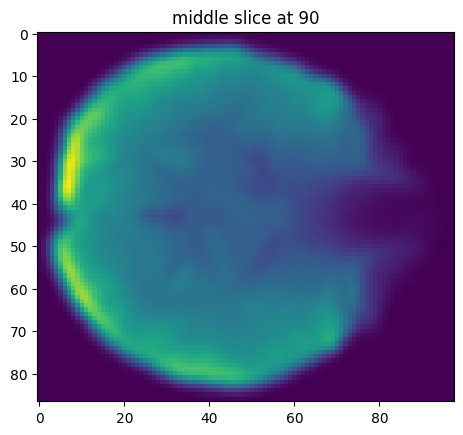

In [17]:
#loop through every 40th timeslice (as you've got 400 of them) and plot it
#print(normalized_brain_vol[3])
for time, value in enumerate(normalized_brain_vol[3]):
    #print(time)
    if time%10 == 0:
        #print(time)
        #print(value)
        slice = normalized_brain_vol[:,:,:,time]
        middle_slice = slice[:,:, slice.shape[2]//2]
        plt.imshow(middle_slice, cmap="viridis")
        plt.title(f"middle slice at {time}")
        plt.show()

# Comparing to a Base
These results won't be meaningful, but they might be a good MVP of your volume renderer.
Instead of comparing to a control condition, let's just compare to the first 3D volume in the series.
Later you can compare this to something more meaningful.

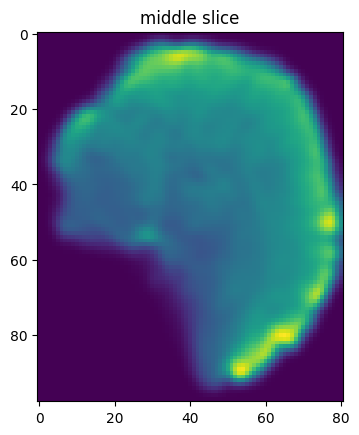

In [18]:
#pulling out the base:

control_test_3D = normalized_brain_vol[:,:,:,0]

#viewing a slice
base_slice = time_index[:][:][50] #hard coded for now
plt.imshow(base_slice, cmap="viridis")
plt.title("middle slice")
plt.show()

In [49]:
# MVP/Testing CAVEATS (READ BEFORE USING!:
# Not applicable to any kind of meaningful analysis
# only tests against a single, 3D slice as the control.
# Difference is calculated as ABSOLUTE as I don't know how VDBs handle negative numbers
# This probably will have to be a seperate variable:
#   As in, there is the unsigned density (0-1) and then some kind of signed float that represents the activation

# lots of possible x/y/z/row/col gore but hopefully that just results in mirroring of final output.

def create_4D_volume_MVP(experimental_4D, control_3D_test_variant):
    fmri_volume = np.zeros(experimental_4D.shape)
    for time_index in range(experimental_4D.shape[3]):
        for z_index in range(experimental_4D.shape[2]):
            for y_index in range(experimental_4D.shape[1]):
                for x_index in range(experimental_4D.shape[0]): 
                    density = np.absolute(fmri_volume[x_index, y_index, z_index, time_index] - control_3D_test_variant[x_index,y_index,z_index])
                    print(density)
                    fmri_volume[x_index,y_index,z_index,time_index] = density
                    print(f"time: {time}, pos: {x_index},{y_index},{z_index}, density: {density}")
    return fmri_volume

In [48]:
fmri_vol = create_4D_volume_MVP(normalized_brain_vol, normalized_brain_vol[:,:,:,0])

4.179493951373988e-08
time: 97, pos: 0,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 1,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 2,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 3,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 4,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 5,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 6,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 7,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 8,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 9,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 10,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 11,0,0, density: 4.179493951373988e-08
4.179493951373988e-08
time: 97, pos: 12,0,0, density: 4.179493951373988e-08
4.179493951373988e-08


IndexError: index 87 is out of bounds for axis 0 with size 87